In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Assignment 3 (due Oct 30th at 11:59pm)

- This assignment covers Linear Regression, Model Selection, and Regularization. Please refer to the class notes and corresponding Colabs on the course website for the required background.

- The assignment requires that you participate of Kaggle Competitions.  We created a private competition that must be accessed via this [invitation link](https://www.kaggle.com/t/678a70d78f624f39b88d30184fe98e8b).

- This assignment is worth **100 points**.  After completing the solutions you will submit a copy of this notebook (`.ipynb`), including all your answers.

- You are free to use any Python library.

>  **Important**: Make sure all cells are executed before saving/downloading a copy of the notebook you will submit.

## Question 1 (5 points)
Load the data files available at the [Kaggle competition](https://www.kaggle.com/competitions/uri-ml-hw-3-f22) created for this assignent.  Print the shapes of all matrices/objects you are creating.  Can use `pandas` or `numpy`.

In [2]:
# your answer here 
train_x = pd.read_csv("uri-ml-hw-3-f22/trainx.csv")
train_y = pd.read_csv("uri-ml-hw-3-f22/trainy.csv")
test_x = pd.read_csv("uri-ml-hw-3-f22/testx.csv")

print("train_x shape: ",train_x.shape, "\ntrain_y shape: ", train_y.shape, "\ntest_x shape: ", test_x.shape)

train_x shape:  (14447, 9) 
train_y shape:  (14447, 2) 
test_x shape:  (6193, 9)


In [3]:
print("train_x first few: \n", train_x.head(), "\ntrain_y first few: \n", train_y.head(), "\ntest_x first few: \n", test_x.head())

train_x first few: 
    Id      F1     F2    F3      F4      F5      F6      F7      F8
0   0 -118.18  34.03  44.0  1629.0   420.0  1893.0   387.0  2.2991
1   1 -118.03  33.97  39.0  1996.0   389.0  1029.0   387.0  4.6500
2   2 -120.15  37.69  13.0   866.0   252.0   369.0   165.0  2.8750
3   3 -118.25  34.06  12.0  4011.0  1438.0  1673.0  1088.0  5.3081
4   4 -118.32  33.94  36.0  1722.0   280.0   830.0   261.0  4.0536 
train_y first few: 
    Id  Expected
0   0  137500.0
1   1  224300.0
2   2   70200.0
3   3  287500.0
4   4  189000.0 
test_x first few: 
       Id      F1     F2    F3      F4      F5      F6      F7      F8
0  14447 -122.71  37.88  21.0  2845.0   552.0   599.0   250.0  4.3125
1  14448 -120.45  34.96  21.0  2121.0   445.0  2211.0   463.0  4.0603
2  14449 -117.89  33.60  36.0  1496.0   247.0   441.0   203.0  7.8164
3  14450 -122.27  37.90  52.0  2041.0   270.0   671.0   253.0  6.9414
4  14451 -118.45  34.07  13.0  4284.0  1452.0  3806.0  1252.0  1.3125


## Question 2 (10 points)
Print the `min` and `max` values for all input features in the training data and the test data.  It will give you a rough idea of ranges on each column.

In [4]:
# your answer here
print("Max in each feature of train_x: \n", train_x.max(), "\nMin in each feature of train_x: \n", train_x.min())


Max in each feature of train_x: 
 Id    14446.0000
F1     -114.3100
F2       41.9500
F3       52.0000
F4    39320.0000
F5     6445.0000
F6    35682.0000
F7     6082.0000
F8       15.0001
dtype: float64 
Min in each feature of train_x: 
 Id      0.0000
F1   -124.3500
F2     32.5500
F3      1.0000
F4      2.0000
F5      1.0000
F6      3.0000
F7      1.0000
F8      0.4999
dtype: float64


In [5]:
print("Max in each feature of test_x: \n", test_x.max(), "\nMin in each feature of test_x: \n", test_x.min())

Max in each feature of test_x: 
 Id    20639.0000
F1     -114.4900
F2       41.9200
F3       52.0000
F4    30450.0000
F5     5033.0000
F6    12873.0000
F7     4855.0000
F8       15.0001
dtype: float64 
Min in each feature of test_x: 
 Id    14447.0000
F1     -124.3000
F2       32.5400
F3        1.0000
F4        6.0000
F5        2.0000
F6        8.0000
F7        2.0000
F8        0.4999
dtype: float64


## Question 3 (75 pts)
Here you will perform model selection, testing a number of different configurations for a final model.

- play with regularization methods.  You are expected to try plain Linear Regression, and Linear Regression with L1/L2 regularization.  You can use the code provided in class or rely on `scikit-learn` implementations.  20 points are awarded for a correct use of all three methods.

- apply different pre-processing techniques.  30 points are awarded here for a correct pre-processing.  We expect you to preprocess your data with the following strategies:

    - normalization or scaling (e.g. `StandardScaler`, `MinMaxScaler`, `RobustScaler`)
    - feature transformations (e.g. `PolynomialFeatures`, applying functions like `log`, or both)
    - PCA after feature transformations

> Hint: most of the transformations require you to `fit` to the training data first and then `transform` the test data.  Please read the documentation of every transformation you intend to apply.  Alternatively, a `Pipeline` is extremely useful.  Examples can be found at [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html).

- model selection must use **cross-validation**. You can use any of the functions provided in scikit-learn (e.g. `cross_val_score`, `train_test_split`).  Here is a good introduction to their usage: [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html).  25 points are awarded for a correct use of CV.

> Hint: if you dont want to implement your own cross-validation loop, there is a `GridSearchCV` object that can help in the process.  Documentation is available at [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html).

### Initial Preprocessing

In [6]:
output_df = pd.DataFrame(test_x.Id)

In [7]:
output_df.head()

,Id
0,14447
1,14448
2,14449
3,14450
4,14451


In [8]:
train_x = train_x.drop(columns = 'Id')
train_y = train_y.drop(columns = 'Id')
test_x = test_x.drop(columns = 'Id')

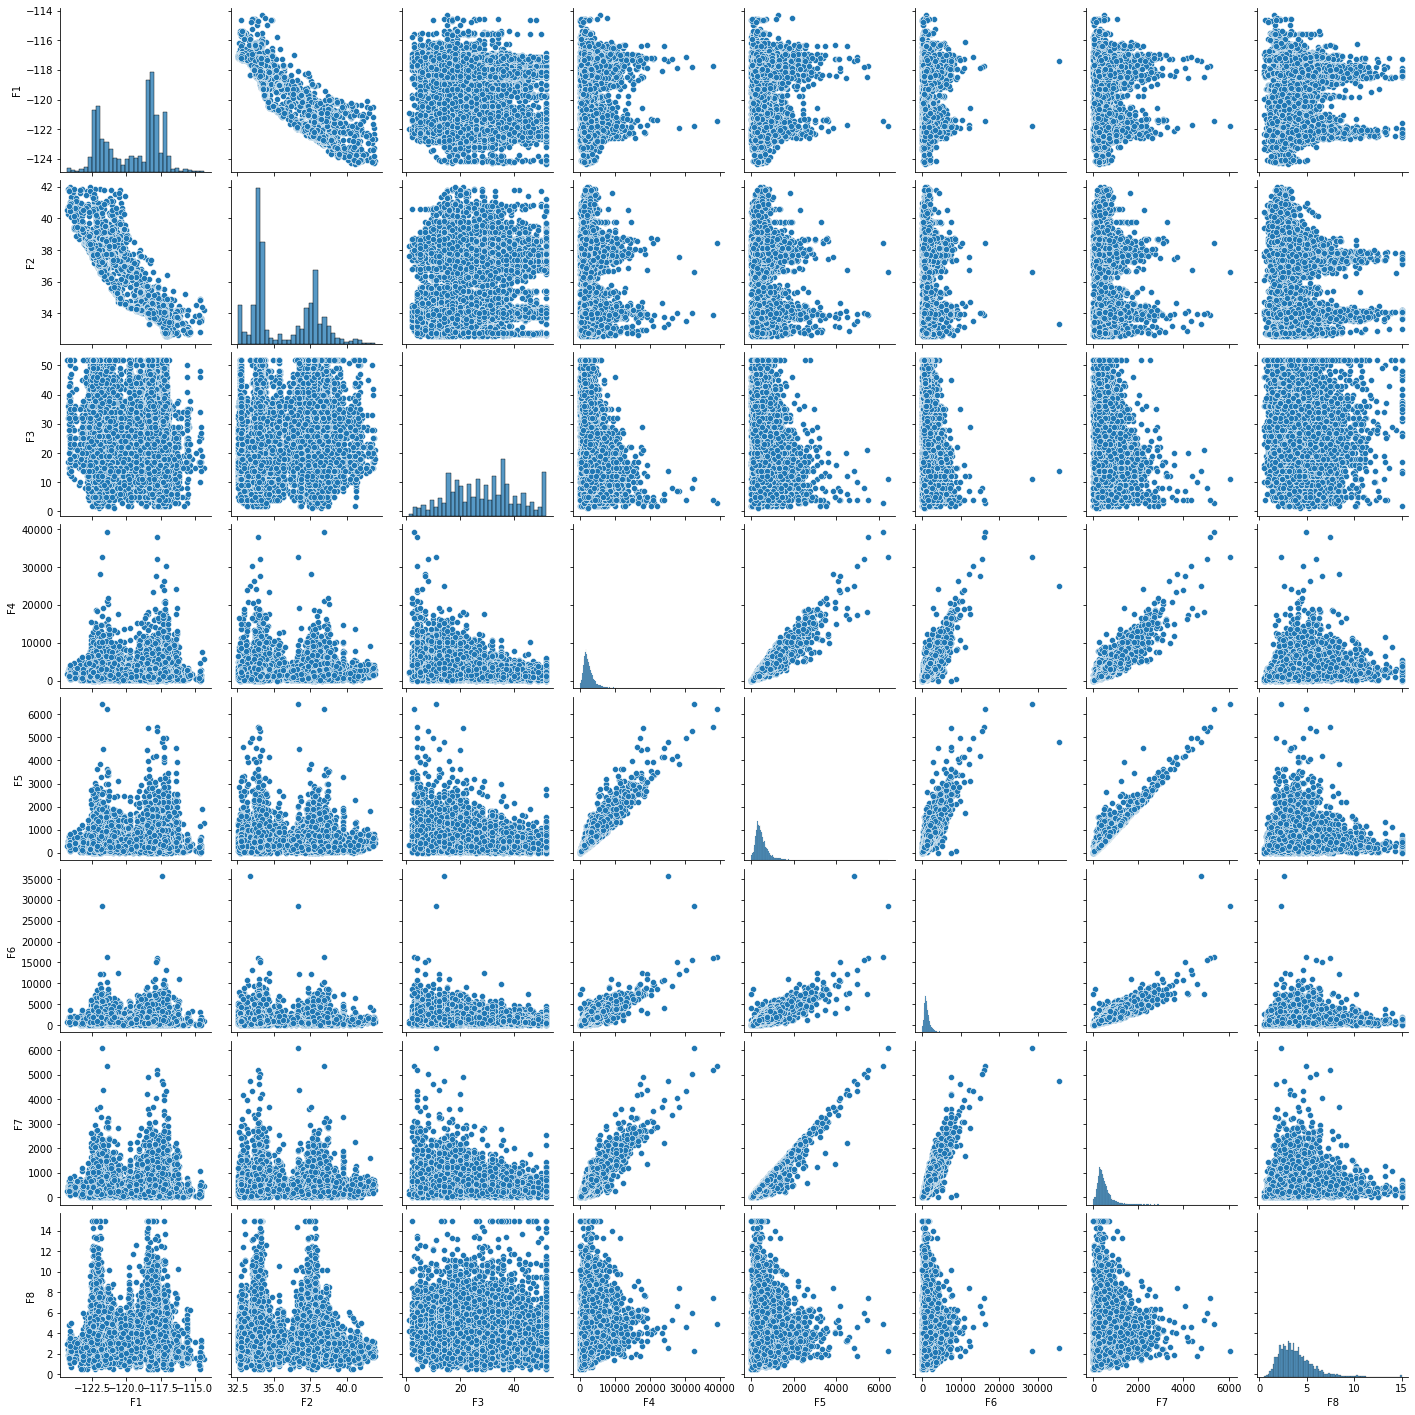

In [9]:
sns.pairplot(train_x)

In [10]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()

# First Model 
#### Regular Linear Regression with Robust Scaler and PolynomialFeatures == 2 and PCA with cutoff at 95%

In [11]:
lr_pipe = Pipeline([
    ('robust_scaler', preprocessing.RobustScaler()), 
    ('polynomailfeatures', preprocessing.PolynomialFeatures(2)), 
    ('PCA', PCA(n_components = 0.95, svd_solver= 'full')), 
    ('Linear Regression', linear_model.LinearRegression())
]
)

In [12]:
print(-1 * cross_val_score(lr_pipe, train_x, train_y, cv=10, scoring = 'neg_root_mean_squared_error'))

[117288.67078766 115115.13734309 116447.86119489 116808.56526957
 112748.9515617  115295.6363525  113316.68318298 114169.04216358
 113450.38820082 113428.22562681]


# Second Model
#### L2 Regression with Robust Scaler and PolynomialFeatures == 2 and PCA with cutoff at 95%

In [13]:
L2_pipe = Pipeline(steps = [
    ('robust_scaler', preprocessing.RobustScaler()),
    ('PolynomialFeatures', preprocessing.PolynomialFeatures(2)),
    ('PCA', PCA(n_components= .95)),
    ('L2 Regression', linear_model.Ridge(alpha = .0001))
])

In [14]:
print(-1 * (cross_val_score(L2_pipe, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error')))

[116120.731404   116639.11289825 114012.7648224  113709.40173904
 113420.60664128]


In [15]:
L2_pipe.fit(train_x, train_y)
L2_preds = L2_pipe.predict(test_x)

# Third Model
#### L1 Regression with Robust Scaler and PolynomalFeatures == 2 and PCA with cutoff at 95%

In [16]:
L1_pipe = Pipeline(steps = [
    ('robust_scaler', preprocessing.RobustScaler()), 
    ('PolynomaialFeatures', preprocessing.PolynomialFeatures(2)),
    ('PCA', PCA(n_components = .95, svd_solver='full')),
    ('L1 Regression', linear_model.Lasso(alpha = .0001))
])

In [17]:
print(-1 * (cross_val_score(L1_pipe, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error')))

[116120.73139847 116639.11289839 114012.76482262 113709.40173961
 113420.60664133]


# Fourth Model
#### L2 Regression with Grid Search on alpha values

In [18]:

ridge_param_grid = [{
    'L2_Regression__alpha': [.1, .01, .001, .0001]
    }]



In [19]:
Ridge_pipe = Pipeline([
    ('robust_scaler', preprocessing.RobustScaler()),
    ('PCA', PCA(n_components = .95, svd_solver='full')),
    ('L2_Regression', linear_model.Ridge())
])

In [20]:
fourth_pipe_grid = GridSearchCV(Ridge_pipe, param_grid = ridge_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
fourth_pipe_grid.fit(train_x, train_y)
fourth_pipe_grid.best_params_

{'L2_Regression__alpha': 0.0001}

In [21]:
print(-1 * (cross_val_score(fourth_pipe_grid.best_estimator_, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error')))

[78654.98985389 80821.91585767 84300.18617634 80953.29873881
 81254.75254439]


# Fifth Model
#### L2 regression with multiple PolynomialFeature Transformations

In [22]:
degrees = [2, 3, 4, 5]

for degree in degrees:

    fifth_pipe = Pipeline([
    ('robust_scaler', preprocessing.RobustScaler()),
    ('polynomialfeatures', preprocessing.PolynomialFeatures(degree = 2)),
    ('PCA', PCA(n_components = .95, svd_solver = 'full')),
    ('L2_Regression', linear_model.Ridge())
    ])
    fifth_grid_pipeline = GridSearchCV(fifth_pipe, param_grid = ridge_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
    fifth_grid_pipeline.fit(train_x, train_y)
    
    print("Degree {} RSME:\n{}\n".format(degree, -1 * (cross_val_score(fifth_grid_pipeline.best_estimator_, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error'))))



Degree 2 RSME:
[116120.73075934 116639.11290486 114012.76483189 113709.40179307
 113420.60664441]

Degree 3 RSME:
[116120.73075934 116639.11290486 114012.76483189 113709.40179307
 113420.60664441]

Degree 4 RSME:
[116120.73075934 116639.11290486 114012.76483189 113709.40179307
 113420.60664441]

Degree 5 RSME:
[116120.73075934 116639.11290486 114012.76483189 113709.40179307
 113420.60664441]



In [23]:
components = [8, 16, 32, 40]

for component in components:

    sixth_pipe = Pipeline([
    ('robust_scaler', preprocessing.RobustScaler()),
    ('polynomialfeatures', preprocessing.PolynomialFeatures(degree = 2)),
    ('PCA', PCA(n_components = component)),
    ('L2_Regression', linear_model.Ridge())
    ])
    sixth_grid_pipeline = GridSearchCV(sixth_pipe, param_grid = ridge_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
    sixth_grid_pipeline.fit(train_x, train_y)
    
    print("Components {} RSME:\n{}\n".format(component, -1 * (cross_val_score(sixth_grid_pipeline.best_estimator_, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error'))))

Components 8 RSME:
[ 97563.0211506   99796.78012328 102170.99438902  99637.84325796
  99189.15738553]

Components 16 RSME:
[78067.40686838 79587.9285541  82816.67693458 78742.89268932
 79659.63759353]

Components 32 RSME:
[87320.52873919 69711.27934872 72583.39056871 68313.8084977
 67164.10827434]

Components 40 RSME:
[73594.48634389 66164.77660127 68132.54391928 63739.99819964
 63333.37430625]



In [24]:
best_sixth_pipe = Pipeline([
('Minmax', preprocessing.MinMaxScaler()),
('polynomialfeatures', preprocessing.PolynomialFeatures(degree = 2)),
('PCA', PCA(n_components = 40)),
('L2_Regression', linear_model.Ridge())
])
best_sixth_grid_pipeline = GridSearchCV(best_sixth_pipe, param_grid = ridge_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
best_sixth_grid_pipeline.fit(train_x, train_y)
    
print("Cross validation cv = 5 RMSE:\n{}".format(-1 * (cross_val_score(best_sixth_grid_pipeline.best_estimator_, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error'))))

Cross validation cv = 5 RMSE:
[62766.68318368 66322.61439854 66845.55380908 64301.87907595
 63525.5237275 ]


# Seventh Model

In [25]:
seventh_pipe = Pipeline([
('minmaxscaler', preprocessing.MinMaxScaler()),
('polynomialfeatures', preprocessing.PolynomialFeatures(degree = 5)),
('L2_Regression', linear_model.Ridge())
])
seventh_grid_pipeline = GridSearchCV(seventh_pipe, param_grid = ridge_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
seventh_grid_pipeline.fit(train_x, train_y)
    
print("Cross validation cv = 5 RMSE:\n{}".format(-1 * (cross_val_score(seventh_grid_pipeline.best_estimator_, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error'))))

Cross validation cv = 5 RMSE:
[59628.96176014 61442.8441622  63429.28453871 67335.03377147
 58302.98657187]


# Eighth Model
Builds on top of previous model testing. This time adding power transformer to make the data more like a "normal" distribution

In [26]:
eigth_pipe = Pipeline([
('minmaxscaler', preprocessing.MinMaxScaler()),
('powertransformer', preprocessing.PowerTransformer()),
('polynomialfeatures', preprocessing.PolynomialFeatures(degree = 3)),
('L2_Regression', linear_model.Ridge())
])
eigth_grid_pipeline = GridSearchCV(eigth_pipe, param_grid = ridge_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
eigth_grid_pipeline.fit(train_x, train_y)
    
print("Cross validation cv = 5 RMSE:\n{}".format(-1 * (cross_val_score(eigth_grid_pipeline.best_estimator_, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error'))))

Cross validation cv = 5 RMSE:
[55916.07474233 60412.08894684 63576.49103847 57142.4803562
 56634.53466853]


# Ninth Model

In [27]:
ninth_param_grid = [{
    'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8],
    'L2_Regression__alpha': [.01, .001, .0001]
    }]

In [28]:
ninth_pipe = Pipeline([
('scaler', preprocessing.MinMaxScaler()),
('quantiletransformer', preprocessing.QuantileTransformer()),
('polynomialfeatures', preprocessing.PolynomialFeatures()),
('L2_Regression', linear_model.Ridge())
])
ninth_grid_pipeline = GridSearchCV(ninth_pipe, param_grid = ninth_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
ninth_grid_pipeline.fit(train_x, train_y)
    
print("Cross validation cv = 5 RMSE:\n{}".format(-1 * (cross_val_score(ninth_grid_pipeline.best_estimator_, train_x, train_y, cv = 5, scoring = 'neg_root_mean_squared_error'))))

Cross validation cv = 5 RMSE:
[54104.68646978 57051.6481535  57960.30212326 55185.55040551
 53767.42178803]


In [29]:
ninth_grid_pipeline.best_params_

{'L2_Regression__alpha': 0.01, 'polynomialfeatures__degree': 6}

In [30]:
curr_best_model = ninth_grid_pipeline.best_estimator_
bm_preds = curr_best_model.predict(test_x)
output_df['Predicted'] = bm_preds
print(output_df.head())
output_df.to_csv("best_model.csv", index = False)

      Id      Predicted
0  14447  332221.432899
1  14448  167075.520850
2  14449  502078.889576
3  14450  380724.629329
4  14451  212092.307873


## Question 4 (10 pts)
Include a description of your best solution, your place in the leaderboard, and public/private scores from the [Kaggle competition](https://www.kaggle.com/competitions/uri-ml-hw-3-f22).  You will only get points if your scores are above the Linear Regression baseline.

#### Answer
Currently I am number 1 on the leaderboard on Kaggle with a score of 54763. I optimized my model by removing PCA since there seemed to be a bigger impact on scores when I didn't perform PCA after feature transformations. To further improve my model, I explored documentation on sklearn.preprocessing. While reading the available preprocessing functions, I identified a preprocessing technique that I thought would be helpful: PowerTransformer(). PowerTransformer() transforms the data so that it follows a distribution that is distributed more like a normal distribution. I created a pipeline that included PowerTransformer() after the scaling the data that performed better than any of my other models. I still wasn't happy enough since I wanted to be number 1 on the leaderboard. I then looked at preprocessing.QuantileTransformer(). QuantileTransformer() transforms each feature to have a uniform distribution. I then performed GridSearch to identify the best combination of degrees for PolynomialFeatures and alpha values for the RidgeRegression. 